# Introduction

This project is intended to research the college admission statistics and determine if there is a correlation between selectivity and graduate earnings. This may potentially be useful for parents and students as they will get a better understanding of what college to choose. In the bigger picture, it's important to close the earnings gap between students from rich and poor families and this knowledge may be helpful to students that don't have much but want to utilize their resources to the maximum. 





# Research Questions 

I want to learn if colleges with stricter admission metrics report higer student earnings after graduation. 

Hypothesis:
1. Private-nonprofit colleges report higer student earnings after graduation. 
2. Colleges with lower admission rate report higer student earnings after graduation.
3. Colleges with higher SAT average report higer student earnings after graduation.

# Background and Related Work

1. This article explores the correlation between selectivity and the graduate earnings after 10 years. They concluded that graduades from selective colleges earn more, but school alone is not the only factor determening the income:
https://www.insidehighered.com/news/2016/08/22/study-finds-graduates-most-selective-colleges-enjoy-earnings-payoff#:~:text=The%20results%20show%20that%2C%20after,and%2019%20percent%20more%20than

2. Another article studied the gap between rich and poor students. They found a positive correlation between college selectivity and future earnings. They surveyed people 6 and 10 years after graduation, the  effect of college type on earnings was more pronounced 10 years after enrollment, where students who enrolled in selective colleges on average earned 20 percent more than students who attended nonselective colleges. They also studied the types of colleges and found that those who attended for-profits colleges earned 18 percent less than those who went to private not-for-profit institutions: https://www.insidehighered.com/news/2018/09/06/analysis-finds-benefits-attending-selective-college-and-penalties-attending-profit

# Methodology

I will be using the Pearson coefficient and linear regression to test for linear correlation of the two variables (columns), for example, acceptance rate and earnings. Linear regression is the easiest method when we want to measure the correlation between two quantitative variables. To test for the validity of the analysis I will find p-values and make sure they are very small. To visualize data I will produce a heatmap with Pearson correlation coefficients and I will also plot data points to produce a scatterplot and include a line of best fit. For a scatterplot, for example, the explanatory (independent) variable would be the acceptance rate and be on the x-axis and the response (dependent) variable would be earnings and be on the y-axis.

# Data selected for analysis:
The dataset that was taken from here: https://www.arcgis.com/home/item.html?id=912cf0e0028c4e26a23daf51443ef9fa, csv version included in the repo. The dataset includes information about ~ 6500 US colleges. The information includes name of the college, different metrics for location,  type, number of students, SAT scores, tuition costs, financial aid, avg graduate earnings , etc. 

# Results

Below are all the libraries we will need for this analysis.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn
import statsmodels.api as s

# 1. Preparation of a Dataset

Access the csv file and make a subset of a dataframe with the columns we want to include. 

In [17]:
excel_file_path = 'College_Scorecard_Data.csv'
df = pd.read_csv(excel_file_path, na_filter=True)
df=df[[ 'NAME', 'STATE', 'TYPE', 'REGION', 
      'ADM_RATE', 'SAT_AVG', 'COST', 'EARNINGS']]
df[:10]

,NAME,STATE,TYPE,REGION,ADM_RATE,SAT_AVG,COST,EARNINGS
0,UniversityofHawaiiatHilo,HI,Public,FarWest,0.6910,978.0,19087.0,38000.0
1,HawaiiCommunityCollege,HI,Public,FarWest,NaN,NaN,13594.0,28200.0
2,MaunaLoaHelicopters,HI,PrivateFor-Profit,FarWest,1.0000,NaN,NaN,NaN
3,UniversityofHawaiiMauiCollege,HI,Public,FarWest,NaN,NaN,13256.0,35600.0
4,KapiolaniCommunityCollege,HI,Public,FarWest,NaN,NaN,10458.0,40800.0
5,PaulMitchelltheSchool-Honolulu,HI,PrivateFor-Profit,FarWest,NaN,NaN,23083.0,NaN
6,ChaminadeUniversityofHonolulu,HI,PrivateNonprofit,FarWest,0.9133,976.0,33824.0,36800.0
7,HawaiiMedicalCollege,HI,PrivateFor-Profit,FarWest,NaN,NaN,21237.0,NaN
8,WorldMedicineInstitute,HI,PrivateNonprofit,FarWest,NaN,NaN,NaN,NaN
9,UniversityofHawaiiatManoa,HI,Public,FarWest,0.8498,1075.0,22153.0,45600.0


Add a new column for Return of Investment (ROI) by dividing earnings after graduation by the cost of attendance.

In [27]:
df['ROI'] = np.where(df['EARNINGS'] < 1, df['COST'], df['EARNINGS']/df['COST'])

# 2. Analysis of the Dataset

1. Begin with descriptive statistics.

In [28]:
df.describe(include='all')

,NAME,STATE,TYPE,REGION,ADM_RATE,SAT_AVG,COST,EARNINGS,ROI
count,6583,6583,6583,6583,1975.000000,1298.000000,5826.000000,4984.000000,4652.000000
unique,6460,51,3,8,NaN,NaN,NaN,NaN,NaN
top,McCannSchoolofBusiness&Technology,CA,PrivateFor-Profit,Southeast,NaN,NaN,NaN,NaN,NaN
freq,9,660,2806,1658,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.669671,1060.436055,23596.358050,36092.335474,1.695216
std,NaN,NaN,NaN,NaN,0.208911,136.789883,12295.056365,15038.544679,0.832268
min,NaN,NaN,NaN,NaN,0.000000,712.000000,2473.000000,13500.000000,0.371975
25%,NaN,NaN,NaN,NaN,0.542000,970.000000,14936.500000,26400.000000,1.057519
50%,NaN,NaN,NaN,NaN,0.691300,1040.000000,20746.500000,33500.000000,1.430394
75%,NaN,NaN,NaN,NaN,0.824500,1120.000000,27711.500000,42100.000000,2.207791


2. Find top 10 colleges in Washington State by earnings after graduation. 

In [20]:
df[df['STATE'] == "WA"].nlargest(10, 'EARNINGS')[['NAME', 'EARNINGS']]

,NAME,EARNINGS
6527,DigiPenInstituteofTechnology,72800.0
6460,UniversityofWashington-TacomaCampus,61000.0
6514,UniversityofWashington-SeattleCampus,61000.0
6537,UniversityofWashington-BothellCampus,61000.0
6497,SeattleUniversity,56100.0
6520,GonzagaUniversity,54800.0
6403,PerryTechnicalInstitute,54500.0
6511,DiversInstituteofTechnology,51300.0
6418,WashingtonStateUniversity,51000.0
6464,UniversityofPugetSound,50600.0


3. Next find top 10 colleges in WA by the Return of Investment

In [21]:
df[df['STATE'] == "WA"].nlargest(10, 'ROI')[['NAME', 'EARNINGS','ROI']]

,NAME,EARNINGS,ROI
6495,SeattleVocationalInstitute,33500.0,3.595192
6569,BellinghamTechnicalCollege,43000.0,3.467462
6530,LakeWashingtonInstituteofTechnology,44300.0,3.386074
6493,BellevueCollege,45000.0,3.369777
6463,BatesTechnicalCollege,37700.0,3.357378
6534,ShorelineCommunityCollege,42700.0,3.257801
6522,SpokaneCommunityCollege,34400.0,3.248654
6461,TacomaCommunityCollege,36900.0,3.068862
6453,PierceCollege-FortSteilacoom,36900.0,3.028314
6528,NorthSeattleCollege,38000.0,2.951456


This information may be usefull to families that can't afford expensive colleges but want to maximize return on investment. 

# 3. Analysis - Type of College vs Earnings

1. Find median earnings for every type of college.

In [22]:
median = df['EARNINGS'].groupby(df['TYPE']).agg(np.median)
median

TYPE
PrivateFor-Profit    25700.0
PrivateNonprofit     42500.0
Public               34300.0
Name: EARNINGS, dtype: float64

2. Visualize it using bar graph.

Text(0, 0.5, '')

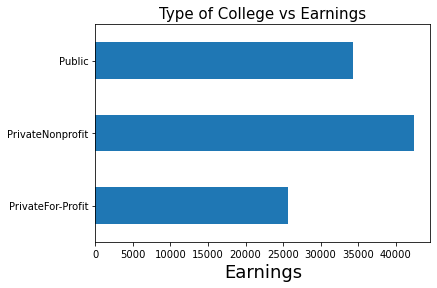

In [23]:
median.plot(kind='barh')
plt.xlabel('Earnings',fontsize=18)
plt.title('Type of College vs Earnings',fontsize=15)
plt.ylabel('')

We can see that Private Nonprofit colleges earn the most on average.

# 4. Analysis - Linear Correlations 

1. Find Pearson correlation between the variables. 

In [24]:
pearsoncorr = df.corr(method='pearson', min_periods=0)
pearsoncorr

,ADM_RATE,SAT_AVG,COST,EARNINGS,ROI
ADM_RATE,1.000000,-0.405860,-0.262426,-0.284555,0.038023
SAT_AVG,-0.405860,1.000000,0.532791,0.696211,-0.050177
COST,-0.262426,0.532791,1.000000,0.546380,-0.624169
EARNINGS,-0.284555,0.696211,0.546380,1.000000,0.150002
ROI,0.038023,-0.050177,-0.624169,0.150002,1.000000


2. visualize it using heatmap.

<AxesSubplot:>

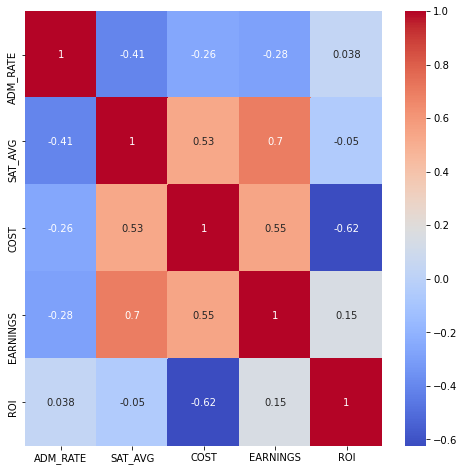

In [25]:
plt.figure(figsize=(8,8))
seaborn.heatmap(df.corr(), annot=True, cmap="coolwarm")

We see that SAT average has the biggest linear correlation with earnings, correlation between cost and earnings is also big, corelation between admission rate and earnings is moderate negative.

# Correlation - Admission Rate vs Earnings 

1. Create a subset with two variables of interest and drop na values, this will allow us to perform regression analysis later, since we need paired data. 

In [112]:
df1=df[['ADM_RATE', 'EARNINGS']].dropna()
df1[:10]

,ADM_RATE,EARNINGS
0,0.6910,38000.0
6,0.9133,36800.0
9,0.8498,45600.0
15,0.7537,51000.0
19,0.5556,27800.0
20,0.6806,38000.0
23,0.2708,43200.0
36,0.3771,64900.0
42,0.5007,46000.0
67,0.3953,33600.0


2. Check that we have enough rows for the analysis

In [113]:
len(df1)

1780

3. Find the p-value and make sure its value is small. Find the r coeeficient. 


In [80]:
from scipy.stats import pearsonr
pearsonr(df1['ADM_RATE'], df1['EARNINGS'])

(-0.28455478941001555, 1.6577295796645304e-34)

The p-value is small and the Pearson correlation is -0.284. It's a weak-moderate negative linear correlation.

4. Create a regression model, this will be used in the next step for visualization

In [81]:
from scipy.stats import linregress
X=df1[['ADM_RATE']]
y=df1[['EARNINGS']]
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

5. Create a scatterplot and the line of best fit to visualize the correlation between admission rate and earnings.  

<function matplotlib.pyplot.show(close=None, block=None)>

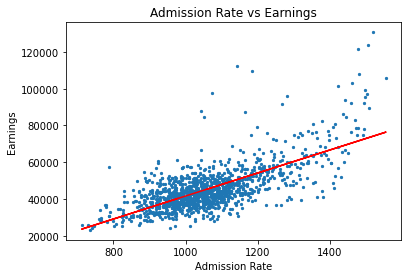

In [114]:
plt.scatter(X,y,s=5)
plt.plot(X,y_pred, color='red')
plt.title('Admission Rate vs Earnings')
plt.xlabel('Admission Rate')
plt.ylabel('Earnings')
plt.show

 From the plot it's hard to conclude if this graph is linear. The correlation is may actually be monotonic but exponential. As the admission rate falls below 0.2, we see that the earnings begin a steep ascend. We need further analysis.  More testing is needed to validate the relationship.

# 5. Correlation - SAT vs Earnings

Here we perform the same analysis as for the Admission rate vs Earnings. (I'm not sure how to reduce the redundancy) 

1. Create a subset with two variables of interest and drop na values, this will allow us to perform regression analysis later.

In [90]:
df2=df[['SAT_AVG', 'EARNINGS']].dropna()
df2[:10]


,SAT_AVG,EARNINGS
0,978.0,38000.0
6,976.0,36800.0
9,1075.0,45600.0
23,1096.0,43200.0
36,1323.0,64900.0
42,1130.0,46000.0
90,930.0,47800.0
97,930.0,50200.0
121,1127.0,53000.0
169,950.0,40600.0


2. Find the p-value and make sure its value is small. Find the r coeeficient. 


In [92]:
from scipy.stats import pearsonr
pearsonr(df2['SAT_AVG'], df2['EARNINGS'])

(0.696211404774295, 3.276210698848164e-185)

The p value is small, the r coeffcient is 0.696, which is a strong positive correlation. 

3. Create a regression model, this will be used in the next step for visualization

In [ ]:
from scipy.stats import linregress
X=df2[['SAT_AVG']]
y=df2[['EARNINGS']]
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)


4. Create a scatterplot and the line of best fit to visualize the correlation between SAT scores and earnings.  

<function matplotlib.pyplot.show(close=None, block=None)>

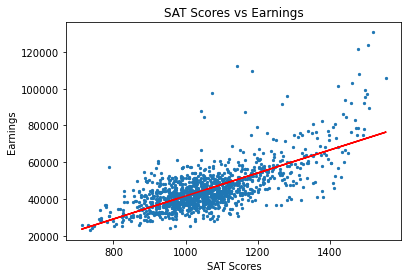

In [100]:
plt.scatter(X,y,s=5)
plt.plot(X,y_pred, color='red')
plt.title('SAT Scores vs Earnings')
plt.xlabel('SAT Scores')
plt.ylabel('Earnings')
plt.show

This is a monotonic relationship, where Earnings increase as SAT scores increase. This looks like a linear relationship,
but there is still a hint to an exponential relationship, since the Earnings begin a steep ascend after SAT scores 
get to 1400. More testing is needed to validate the relationship.

# Limitations

This dataset is most suitable for comparing universities between each other. It's not sufficient enough to compare student performance and correlate it to future earnings. The reason for this is that each college in this dataset only provides the average values for every variable so we can's compare the student performance within the colleges. 

The earnings are also averaged and not separated into majors within the colleges, which may sway the results, since technical colleges will earn more than art colleges and there is no way to separate them apart.   

This dataset provides us only with graduate earnings straight out of the college. If we were provided with more earning checkpoints such as at 5, 10 and 20 years after graduation, we would be more confident in our findings. 



# Conclusion

We can conclude that colleges with lower admission rate and higher average SAT scores report higher graduate earnings straight out of the college. On top of that, college type also plays a role in future earnings, where private nonprofit colleges report the highest student earnings after graduation, private for profit collegest report the least earnings and public colleges are in between. 